# Optimization of parameters in genetic algorithms

This notebook gathers the results for the parameter optimization made on the mono-objective genetic algorithms, considering a binary threshold of 30.

### Brief explanation

With the previous exploration of parameters, we were able to determine which values resulted in better performances. There was obviously not a unique configuration yielding better results so, for the optimization run, we still allowed some variation. We basically assigned different probabilities of appearence to each of the parameters' values. The parameters, their possible values and their associated probabilities are:

- **Estimator**: SVM1 (c=2), SVM2 (c=10), SVM3 (c=50) ------------------------------- Probabilities: 1/3, 1/3, 1/3
- **Annihilation**: AN1 (0.2), AN2 (0.3), AN3 (0.4) ----------------------------------------- Probabilities: 1/6, 1/6, 4/6
- **Elite**: EL1 (0.2), EL2 (0.3), EL3 (0.4) ----------------------------------------------------- Probabilities: 2/6, 1/6, 3/6
- **Mutation rate**: MR1 (0.05), MR2 (0.1), MR3 (0.15) ---------------------------------- Probabilities: 1/2, 1/2, 0
- **Selection**: SE1 (tournament 2-1) , SE2 (tournament 5-2), SE3 (roulette) ------ Probabilities: 1/2, 1/2, 0

For each lobe, we run 20 models whose parameters are selected according to these probabilities. The best is chosen according to accuracy and f1 score in the test dataset.

### Import the packages

We import the packages that will be needed. In this case, everything is already contained in the gatools.py file, that loads submodules of PyWin module.

In [1]:
import matplotlib
import seaborn
import sys
sys.path.insert(0,'../../Tools')
from orderedlist import *
from gatools import *
bi = Binarization()
mo = Models()

In [2]:
pandas.set_option('display.max_rows', None)
pandas.set_option('display.max_columns', None)
pandas.set_option('display.width', None)
pandas.set_option('display.max_colwidth', None)

### Preparation of results

#### General stuff

In [3]:
qual_lobes = bi.get_binary(pandas.read_csv('../../Data/CoarseGrained/Y_lobes_quan.csv'),30)

In [4]:
features = pandas.read_csv('./Optimization_mono_30/optimization_best_features.csv')
features_all = pandas.read_csv('./Optimization_mono_30/optimization_features.csv')
train = pandas.read_csv('./Optimization_mono_30/optimization_best_train.csv')
test = pandas.read_csv('./Optimization_mono_30/optimization_best_test.csv')

In [5]:
tasks_lobes = ['_'.join([i.split('_')[-2],i.split('_')[-1]]) for i in list(features['Model'])]

#### Metrics

In [6]:
pct_lobes = round(numpy.divide(numpy.sum(qual_lobes),qual_lobes.shape[0]).to_frame().transpose(),3)
pct_lobes = pct_lobes.add_prefix('Region=')
pct_lobes.index=['percentage_positive']

In [7]:
metrics_lobes = pandas.DataFrame()
for task in tasks_lobes:
    temp_metrics = mo.evaluate_metrics(train,test,task)
    try: metrics_lobes = pandas.concat([metrics_lobes,temp_metrics],axis=1)
    except: metrics_lobes = temp_metrics

#### Features

In [8]:
features_lobes = pandas.DataFrame()
for task in tasks_lobes:
    temp_features = mo.evaluate_features(features,features_all,task)
    try: features_lobes = pandas.concat([features_lobes,temp_features],axis=0)
    except: features_lobes = temp_features

In [9]:
map_lobes = pandas.DataFrame()
for task in lobes_list:
    try: 
        temp_map = mo.map_features(features_all,features_list,task)
        try: map_lobes = pandas.concat([map_lobes,temp_map],axis=0)
        except: map_lobes = temp_map
    except: pass

### Results

Down below we show the **sorted lobes according to accuracy and f1 score**. In the second table, only test information is given (those lobes appearing at the top are the ones with better overall models).

In [10]:
metrics_pct_lobes = pandas.concat([metrics_lobes,pct_lobes],join='inner')
metrics_pct_lobes

,Region=temporal_l,Region=insular_l,Region=temporal_r,Region=parietal_l,Region=frontal_l,Region=subcortical_r,Region=subcortical_l,Region=occipital_r,Region=insular_r,Region=occipital_l,Region=frontal_r,Region=parietal_r
accuracy_test,0.799+/-0.038,0.896+/-0.018,0.769+/-0.048,0.810+/-0.039,0.818+/-0.030,0.875+/-0.029,0.889+/-0.034,0.808+/-0.048,0.846+/-0.042,0.796+/-0.040,0.737+/-0.034,0.763+/-0.038
accuracy_train,0.837+/-0.010,0.908+/-0.005,0.859+/-0.015,0.902+/-0.011,0.928+/-0.005,0.917+/-0.011,0.912+/-0.010,0.883+/-0.013,0.852+/-0.011,0.840+/-0.009,0.743+/-0.009,0.838+/-0.013
f1_test,0.740+/-0.043,0.606+/-0.071,0.733+/-0.049,0.672+/-0.064,0.641+/-0.055,0.590+/-0.074,0.578+/-0.090,0.630+/-0.082,0.568+/-0.101,0.585+/-0.070,0.605+/-0.048,0.595+/-0.064
f1_train,0.789+/-0.012,0.656+/-0.014,0.836+/-0.015,0.833+/-0.019,0.862+/-0.010,0.716+/-0.029,0.659+/-0.028,0.777+/-0.021,0.578+/-0.025,0.676+/-0.017,0.618+/-0.012,0.720+/-0.020
precision_test,0.672+/-0.058,0.520+/-0.064,0.672+/-0.060,0.635+/-0.064,0.620+/-0.070,0.490+/-0.075,0.520+/-0.122,0.540+/-0.087,0.510+/-0.106,0.545+/-0.086,0.528+/-0.048,0.551+/-0.058
precision_train,0.712+/-0.015,0.552+/-0.017,0.767+/-0.025,0.776+/-0.020,0.802+/-0.013,0.599+/-0.035,0.571+/-0.037,0.650+/-0.027,0.515+/-0.030,0.616+/-0.022,0.533+/-0.012,0.671+/-0.028
recall_test,0.830+/-0.067,0.744+/-0.131,0.812+/-0.070,0.718+/-0.087,0.678+/-0.093,0.762+/-0.123,0.695+/-0.148,0.769+/-0.107,0.653+/-0.123,0.643+/-0.096,0.714+/-0.078,0.652+/-0.089
recall_train,0.883+/-0.017,0.808+/-0.029,0.919+/-0.015,0.900+/-0.026,0.932+/-0.018,0.892+/-0.029,0.782+/-0.044,0.965+/-0.019,0.661+/-0.033,0.749+/-0.035,0.734+/-0.019,0.778+/-0.025
percentage_positive,0.343,0.108,0.389,0.271,0.241,0.117,0.108,0.211,0.154,0.223,0.283,0.268


In [11]:
metrics_pct_lobes.transpose()[['accuracy_test','f1_test','precision_test','recall_test','percentage_positive']]

,accuracy_test,f1_test,precision_test,recall_test,percentage_positive
Region=temporal_l,0.799+/-0.038,0.740+/-0.043,0.672+/-0.058,0.830+/-0.067,0.343
Region=insular_l,0.896+/-0.018,0.606+/-0.071,0.520+/-0.064,0.744+/-0.131,0.108
Region=temporal_r,0.769+/-0.048,0.733+/-0.049,0.672+/-0.060,0.812+/-0.070,0.389
Region=parietal_l,0.810+/-0.039,0.672+/-0.064,0.635+/-0.064,0.718+/-0.087,0.271
Region=frontal_l,0.818+/-0.030,0.641+/-0.055,0.620+/-0.070,0.678+/-0.093,0.241
Region=subcortical_r,0.875+/-0.029,0.590+/-0.074,0.490+/-0.075,0.762+/-0.123,0.117
Region=subcortical_l,0.889+/-0.034,0.578+/-0.090,0.520+/-0.122,0.695+/-0.148,0.108
Region=occipital_r,0.808+/-0.048,0.630+/-0.082,0.540+/-0.087,0.769+/-0.107,0.211
Region=insular_r,0.846+/-0.042,0.568+/-0.101,0.510+/-0.106,0.653+/-0.123,0.154
Region=occipital_l,0.796+/-0.040,0.585+/-0.070,0.545+/-0.086,0.643+/-0.096,0.223


Down below, we include the **selected features for the best model and the most common features in all the models**.

In [12]:
features_lobes

,Features best model,Features all models,Avg#
Region=temporal_l,"[rocf_recognition, ace, vospt_silhouette, diagnostic_CT, fcsrt_l1, fcsrt_dif_total, fcsrt_lt, tlt_total_correct, education_years, st_1]","[(rocf_recognition, 0.9), (fcsrt_lt, 0.85), (education_years, 0.85), (diagnostic_CT, 0.8), (fcsrt_l1, 0.7), (fcsrt_dif_total, 0.4), (tlt_total_correct, 0.25), (tmt_a, 0.2), (ace3_language, 0.2), (ace3_attention, 0.2), (st_1, 0.15), (diagnostic_FTD, 0.15), (sdmt, 0.15), (ace, 0.1), (vospt_silhouette, 0.1), (current_age, 0.1), (st_2, 0.1), (cbtt_indirect, 0.1), (st_3, 0.1), (mst_indirect, 0.1), (fcsrt_total, 0.1), (fcsrt_dif_free, 0.1), (ace3_visuospatial, 0.1), (vospt_decision, 0.05), (ace3_memory, 0.05), (rocf_copy, 0.05), (rocf_3min, 0.05), (diagnostic_AD, 0.05)]",7.05
Region=insular_l,"[rocf_time, st_1, diagnostic_FTD, tlt_total_correct]","[(diagnostic_FTD, 1.0), (tlt_total_correct, 1.0), (rocf_time, 0.85), (st_1, 0.45), (rocf_3min, 0.35), (rocf_recognition, 0.3), (ace3_language, 0.3), (rocf_30min, 0.3), (mst_direct, 0.2), (rocf_copy, 0.2), (ace3_attention, 0.15), (education_years, 0.1), (tmt_a, 0.1), (ace, 0.1), (st_2, 0.1), (ace3_visuospatial, 0.05), (vospt_decision, 0.05), (sex_female, 0.05)]",5.65
Region=temporal_r,"[fcsrt_lt, diagnostic_CT, rocf_3min, ace3_fluency, fcsrt_l1, st_3, rocf_30min, diagnostic_FTD, ace3_visuospatial, st_2, mst_indirect, vospt_silhouette]","[(st_2, 0.9), (rocf_30min, 0.85), (diagnostic_CT, 0.85), (st_3, 0.75), (rocf_3min, 0.7), (vospt_silhouette, 0.65), (mst_indirect, 0.65), (diagnostic_AD, 0.55), (diagnostic_FTD, 0.5), (ace3_fluency, 0.3), (fcsrt_lt, 0.25), (education_years, 0.2), (fcsrt_l1, 0.15), (ace3_memory, 0.1), (rocf_recognition, 0.05), (st_1, 0.05), (fcsrt_dif_free, 0.05), (ft_animals, 0.05), (ace3_visuospatial, 0.05), (rocf_copy, 0.05), (sex_male, 0.05), (ace, 0.05)]",7.80
Region=parietal_l,"[rocf_time, ace3_fluency, education_years, vospt_silhouette, fcsrt_dif_total, vospt_decision, rocf_3min, rocf_recognition, mst_indirect, mst_direct, st_3]","[(st_3, 1.0), (ace3_fluency, 0.8), (diagnostic_AD, 0.6), (tmt_b, 0.5), (sex_male, 0.45), (rocf_recognition, 0.4), (education_years, 0.4), (fcsrt_dif_total, 0.35), (st_2, 0.35), (vospt_silhouette, 0.35), (mst_direct, 0.3), (diagnostic_CT, 0.3), (diagnostic_FTD, 0.25), (vospt_decision, 0.25), (sex_female, 0.2), (tmt_a, 0.2), (rocf_time, 0.15), (rocf_30min, 0.15), (ft_animals, 0.15), (fcsrt_total, 0.15), (ace3_visuospatial, 0.15), (st_1, 0.15), (mst_indirect, 0.15), (fcsrt_dif_free, 0.1), (rocf_3min, 0.1), (tlt_total_correct, 0.1), (ace, 0.1), (current_age, 0.1), (bnt, 0.1), (ace3_language, 0.1), (ace3_memory, 0.05), (fcsrt_lt, 0.05), (ace3_attention, 0.05), (ft_formal, 0.05), (sdmt, 0.05)]",8.70
Region=frontal_l,"[education_years, ace3_memory, mst_direct, ace3_fluency, fcsrt_l1, bnt, rocf_recognition, rocf_3min, diagnostic_FTD, fcsrt_lt, diagnostic_AD, st_3]","[(diagnostic_FTD, 0.85), (education_years, 0.75), (cbtt_indirect, 0.6), (ace3_memory, 0.55), (st_3, 0.55), (rocf_3min, 0.4), (mst_direct, 0.35), (mst_indirect, 0.35), (tlt_total_correct, 0.35), (st_1, 0.3), (bnt, 0.25), (diagnostic_AD, 0.25), (ace, 0.25), (diagnostic_CT, 0.2), (vospt_silhouette, 0.2), (ace3_fluency, 0.15), (rocf_recognition, 0.15), (ace3_language, 0.15), (fcsrt_l1, 0.1), (fcsrt_lt, 0.1), (fcsrt_dif_free, 0.1), (fcsrt_total, 0.1), (tmt_b, 0.1), (st_2, 0.1), (ace3_visuospatial, 0.1), (current_age, 0.1), (vospt_decision, 0.1), (rocf_time, 0.05), (rocf_copy, 0.05), (fcsrt_dif_total, 0.05), (ft_animals, 0.05), (rocf_30min, 0.05), (ace3_attention, 0.05)]",7.85
Region=subcortical_r,"[st_1, vospt_discrimination, rocf_3min, mst_indirect, sex_male, ft_animals, ace3_memory, diagnostic_FTD]","[(mst_indirect, 0.9), (diagnostic_FTD, 0.85), (ft_animals, 0.7), (st_1, 0.65), (diagnostic_CT, 0.65), (diagnostic_AD, 0.6), (sex_male, 0.6), (vospt_discrimination, 0.6), (education_years, 0.55), (rocf_30min, 0.5), (current_age, 0.5), (fcsrt_dif_total, 0.45), (ace3_memory, 0.4), (st_2, 0.4), (cbtt_

Down below, we include a **heatmap indicating the frequency of each feature in predicting each lobe**. The features are ordered by nature (diagnostic features, demographic features and cognitive features -ordered themselves according to the cognitive function measured-), making it easier to see patterns.

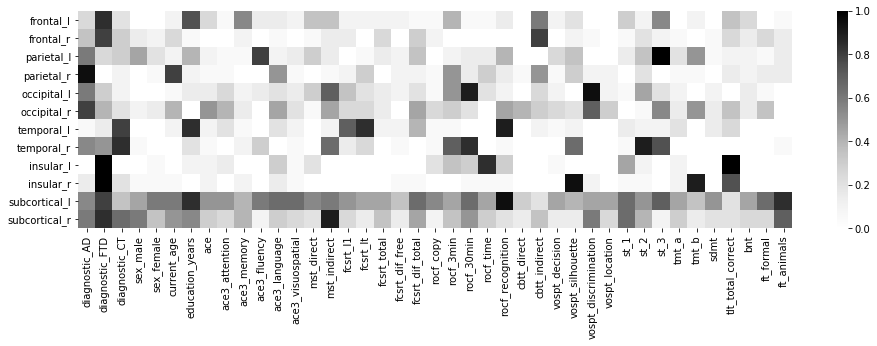

In [13]:
matplotlib.rcParams['figure.figsize'] = (16,4)
seaborn.heatmap(map_lobes,cmap='Greys',xticklabels=True,yticklabels=True)

### Conclusions

We can see that **grouping brain regions into lobes does not improve remarkably our predictions**. In fact, the results obtained are similar to those appearing in the best half of fine-grained prediction. What appears to be happening is that those regions which were best predicted compensate for those regions which were worst predicted. One advantage of doing the coarse-grained prediction is that differences in hypometabolism between lobes are not that pronounced. All lobes have a percentage of hypometabolic patient over 10%, which allows **the variability associated to the predictions to be much lower**.

One thing that turns pretty clear is that **left lobes are predicted better than right lobes**. Such tendency was already mentioned in the fine-grained prediction and can be confirmed from a broader perspective. Regarding the comparison between lobes, this discussion is not as rewarding as it was before. In fact, all brain lobes certainly have parcellations with very different correctness of prediction.